# **Advanced Feature Extraction and Image Processing**

# **Harris Corner Detection**

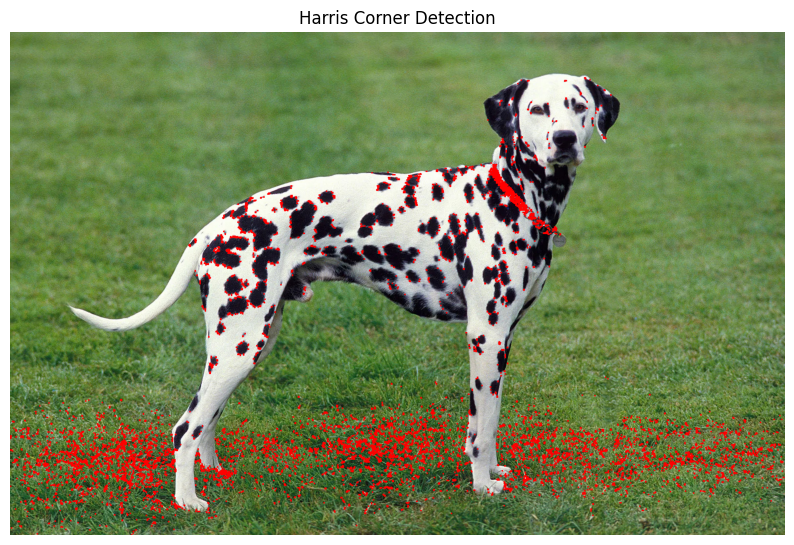

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = '/content/dog1.jpg'  # Change this to your image path
image = cv2.imread(image_path)

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Harris Corner Detection
# Convert to float32
gray_image = np.float32(gray_image)
# Harris corner detection
corners = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# Step 4: Dilate corner image to enhance corner points
corners = cv2.dilate(corners, None)

# Create a copy of the original image to draw corners on
image_corners = image.copy()

# Threshold for an optimal value, it may vary depending on the image.
threshold = 0.01 * corners.max()
image_corners[corners > threshold] = [0, 0, 255]  # Mark corners in red

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_corners, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')  # Hide axes
plt.show()

# **HOG (Histogram of Oriented Gradients) Feature Extraction**

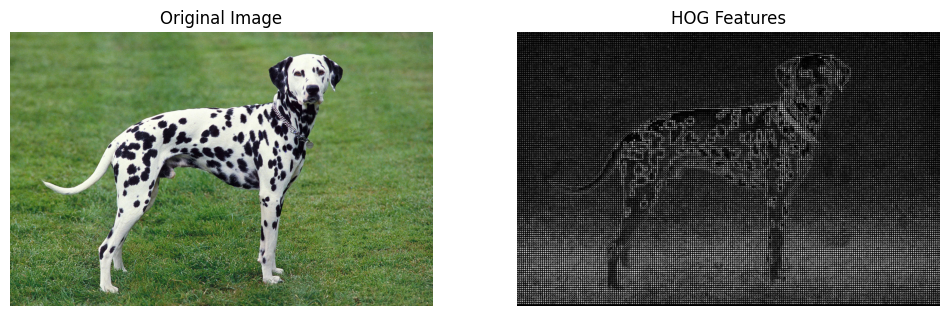

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Step 1: Load the image
image_path = '/content/dog1.jpg'  # Change this to your image path
image = cv2.imread(image_path)

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Compute HOG features
# Compute HOG features and HOG image
features, hog_image = hog(gray_image,
                           orientations=9,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           visualize=True)

# Step 4: Enhance the HOG image for better visualization
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Visualize the original image and HOG features
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display HOG features
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.axis('off')

plt.show()

# **FAST (Features from Accelerated Segment Test) Keypoint Detection**

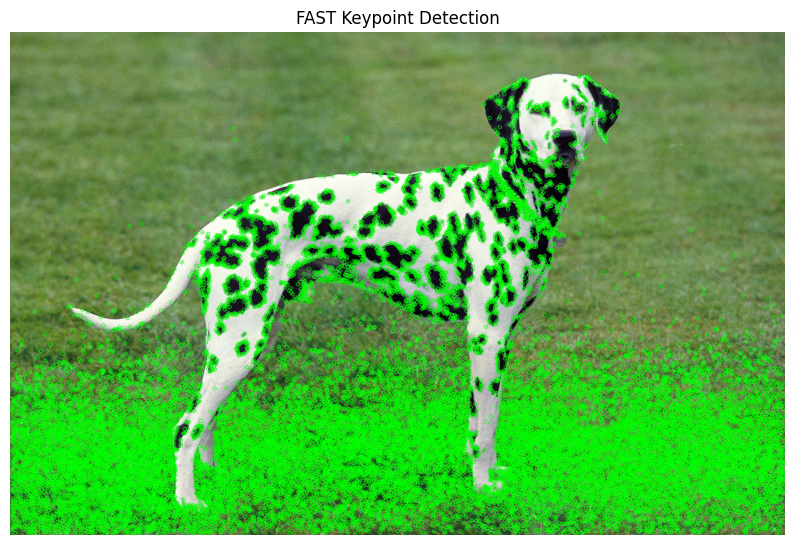

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = '/content/dog1.jpg'  # Change this to your image path
image = cv2.imread(image_path)

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply the FAST algorithm
fast = cv2.FastFeatureDetector_create(threshold=25, nonmaxSuppression=True)  # Create FAST detector
keypoints = fast.detect(gray_image, None)  # Detect keypoints

# Step 4: Draw keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoint Detection')
plt.axis('off')  # Hide axes
plt.show()

# **Feature Matching using ORB and FLANN**

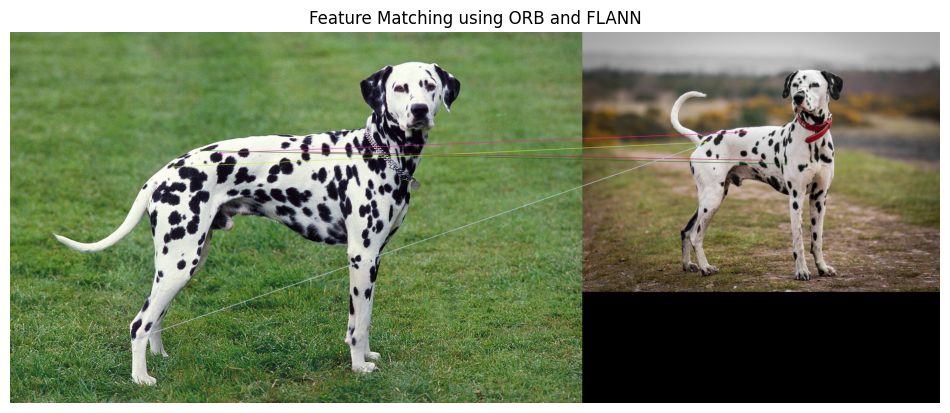

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the two images
image_path1 = '/content/dog1.jpg'  # Change this to your first image path
image_path2 = '/content/dog2.jpg'  # Change this to your second image path
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Step 2: Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Step 3: Extract keypoints and descriptors using ORB
orb = cv2.ORB_create()  # Create ORB detector
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Step 4: Match features using FLANN matcher
# FLANN parameters
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

# Create FLANN matcher and perform matching
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Step 5: Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Step 6: Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching using ORB and FLANN')
plt.axis('off')  # Hide axes
plt.show()

# **Image Segmentation using Watershed Algorithm**

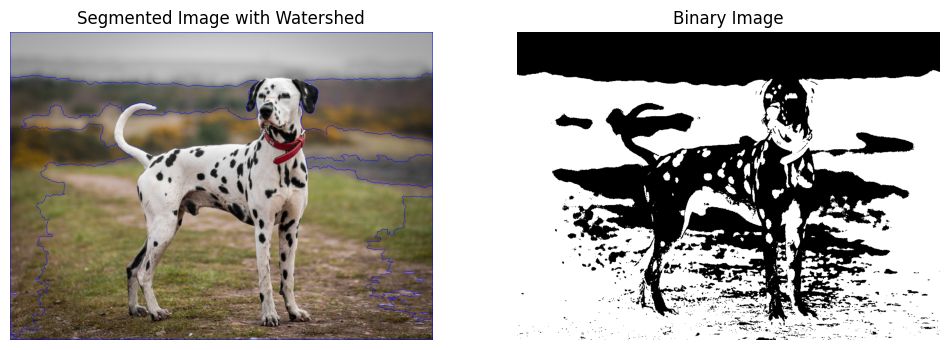

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = '/content/dog2.jpg'  # Change this to your image path
image = cv2.imread(image_path)

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply a threshold to convert the image to binary
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Step 4: Noise removal (optional)
kernel = np.ones((3, 3), np.uint8)
cleaned_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 5: Finding sure foreground area
dist_transform = cv2.distanceTransform(cleaned_binary, cv2.DIST_L2, 5)
_, sure_foreground = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 6: Finding unknown region
sure_foreground = np.uint8(sure_foreground)
unknown_region = cv2.subtract(cleaned_binary, sure_foreground)

# Step 7: Label markers
ret, markers = cv2.connectedComponents(sure_foreground)

# Step 8: Add one to all the labels so that sure regions are marked with a positive integer
markers = markers + 1

# Step 9: Mark the unknown region with zero
markers[unknown_region == 255] = 0

# Step 10: Apply the Watershed algorithm
markers = cv2.watershed(image, markers)

# Step 11: Mark the boundaries
image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Step 12: Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with Watershed')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.show()